# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import scipy.stats as stats

%matplotlib inline

In [2]:
cz_df = pd.read_csv('cubic_zirconia.csv')
cz_df.head(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082


In [3]:
cz_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
cz_df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
cz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
cz_df.shape

(26967, 10)

In [7]:
cz_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [8]:
cz_df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [9]:
dups = cz_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [10]:
cz_df.drop_duplicates().shape

(26933, 10)

In [11]:
for column in cz_df.columns:
    if cz_df[column].dtype == 'object':
        print(column.upper(),'--', cz_df[column].nunique())
        print(cz_df[column].value_counts().sort_values())
        print('\n') 

CUT -- 5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR -- 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY -- 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [12]:
cz_df[['carat' ,'depth', 'table', 'x', 'y', 'z','price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

#### Univariate Analysis/Bivariate Analysis

In [13]:

def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("-------------------")
    print(cz_df[column].describe(),end=' ')
    print('/n')
    
    
    plt.figure()
    print("Distribution of " + column)
    print('-------------------')
    sns.distplot(cz_df[column], kde=True, color='black');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('-------------------')
    ax = sns.boxplot(x=cz_df[column],color='green')
    plt.show()

Description of carat
-------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 /n
Distribution of carat
-------------------


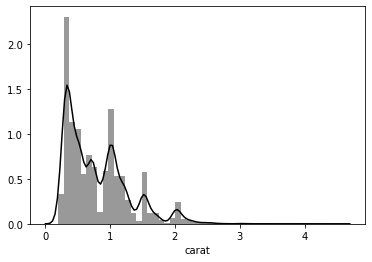

Boxplot of carat
-------------------


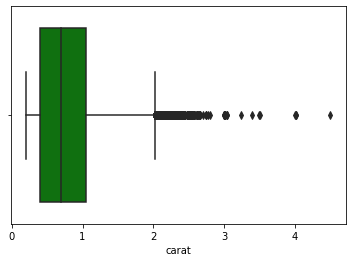

Description of depth
-------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 /n
Distribution of depth
-------------------


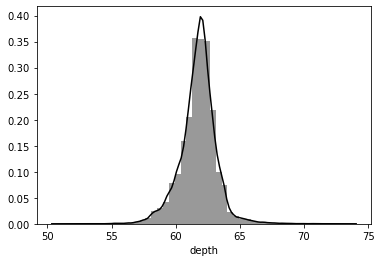

Boxplot of depth
-------------------


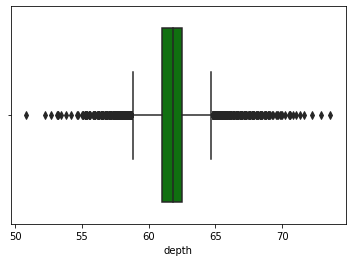

Description of table
-------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 /n
Distribution of table
-------------------


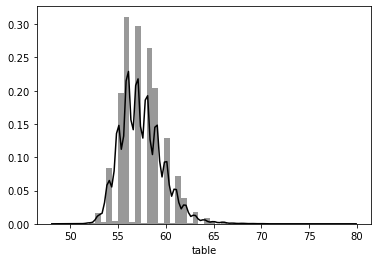

Boxplot of table
-------------------


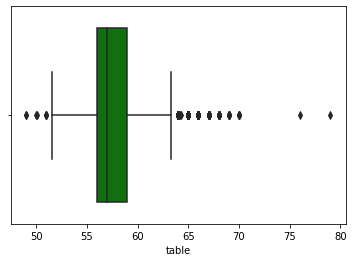

Description of x
-------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 /n
Distribution of x
-------------------


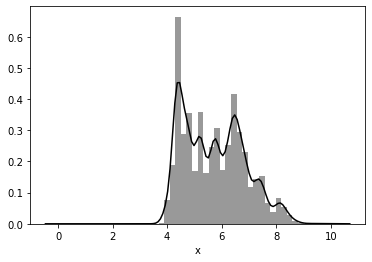

Boxplot of x
-------------------


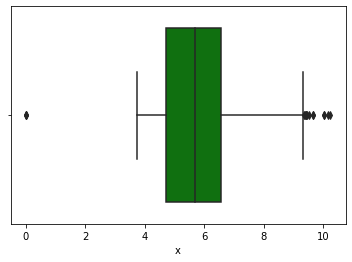

Description of y
-------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64 /n
Distribution of y
-------------------


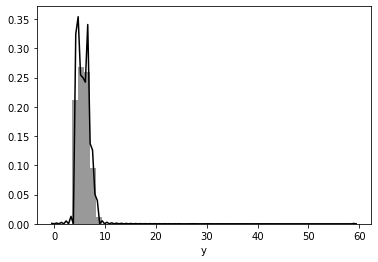

Boxplot of y
-------------------


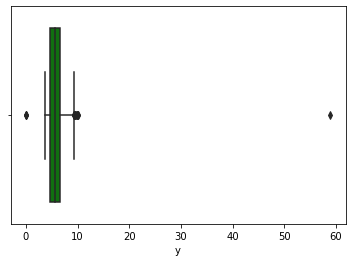

Description of z
-------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 /n
Distribution of z
-------------------


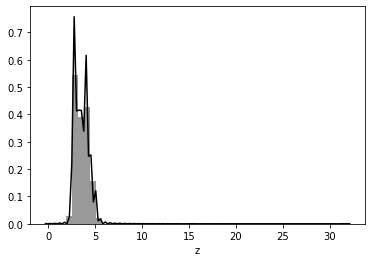

Boxplot of z
-------------------


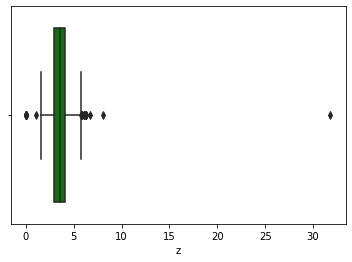

Description of price
-------------------
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64 /n
Distribution of price
-------------------


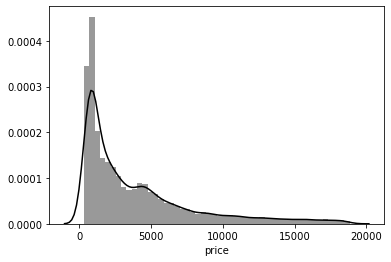

Boxplot of price
-------------------


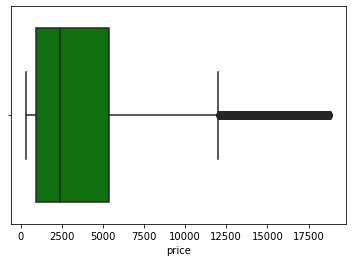

In [14]:
cz_df_num = cz_df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cz_df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,16)

In [15]:
cz_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

#### For Categorical Variables

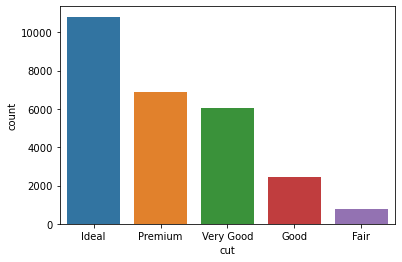

In [16]:
sns.countplot(cz_df['cut'])

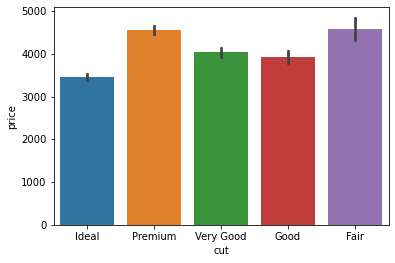

In [17]:
sns.barplot(data = cz_df, x='cut',y='price')

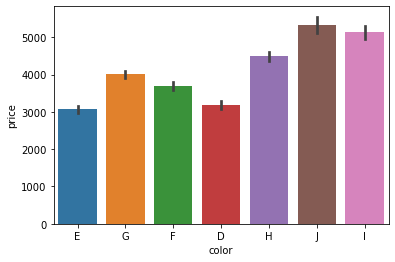

In [18]:
sns.barplot(data = cz_df, x='color',y='price')

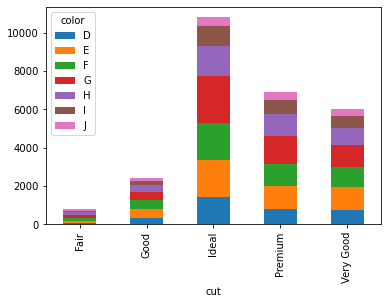

In [19]:
pd.crosstab(cz_df['cut'], cz_df['color']).plot(kind = 'bar', stacked = True)

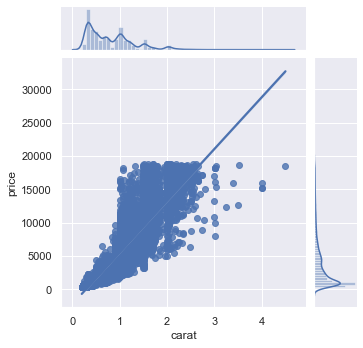

In [20]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('carat', 'price', data = cz_df, kind='reg', height=5)
plt.show()

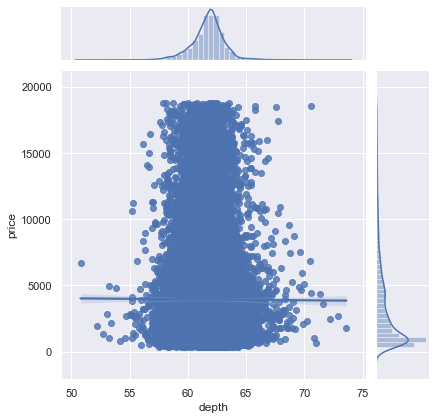

In [21]:
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('depth', 'price', data = cz_df, kind='reg')
plt.show()

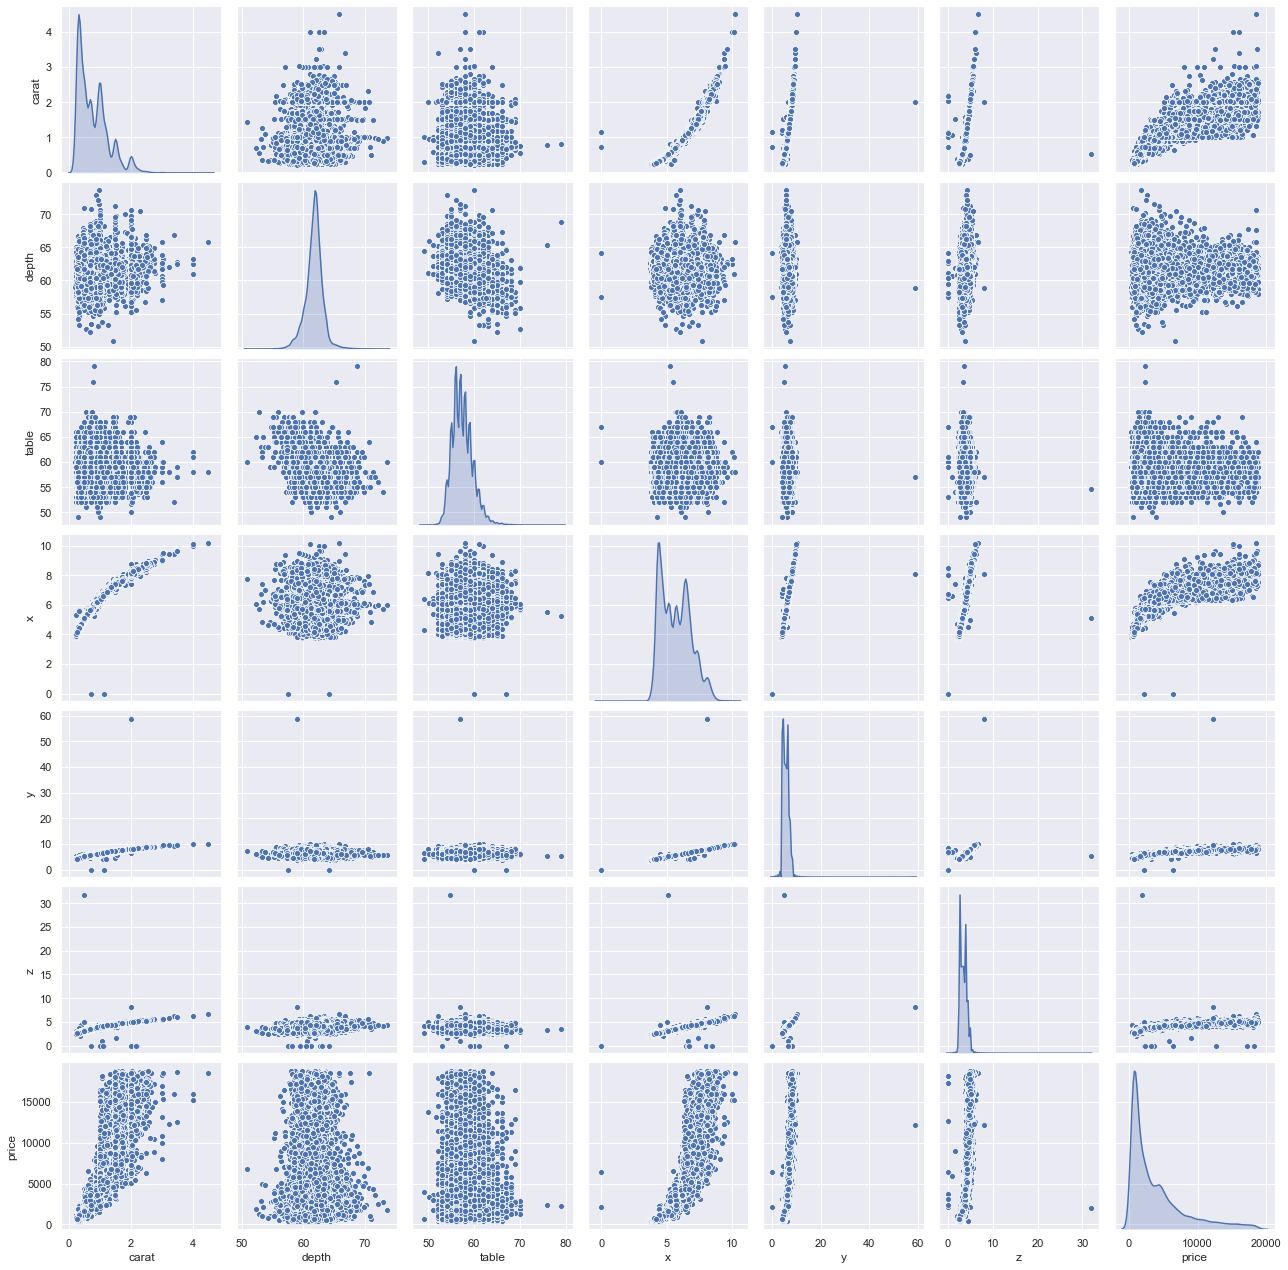

In [22]:
sns.pairplot(cz_df, diag_kind='kde')  
plt.show()

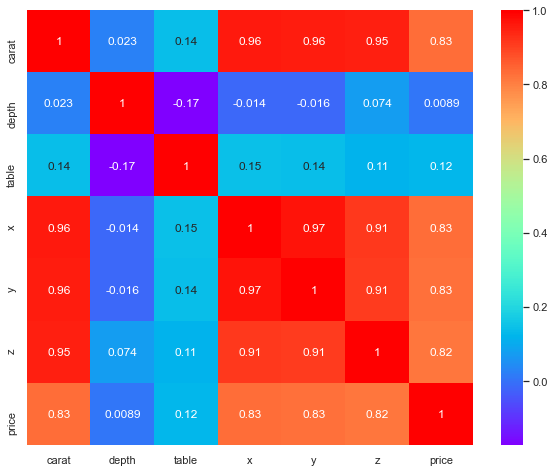

In [23]:
d_cor = cz_df.corr(method='kendall', min_periods=2)
plt.figure(figsize=(10,8))
sns.heatmap(d_cor, cmap='rainbow',annot=True)

In [24]:
cz_df.loc[((cz_df['x'] == 0) | (cz_df['y'] == 0) | (cz_df['z'] == 0))]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [25]:
cz_df.drop(cz_df[((cz_df['x'] == 0) | (cz_df['y'] == 0) | (cz_df['z'] == 0))].index, inplace=True)

In [26]:
for column in cz_df.columns:
    if cz_df[column].dtype != 'object':
        median = cz_df[column].median()
        cz_df[column] = cz_df[column].fillna(median)    
        
cz_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

#### Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled = cz_df.select_dtypes(exclude=['object'])
cz_df[scaled.columns] = sc.fit_transform(scaled)

In [28]:
cz_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


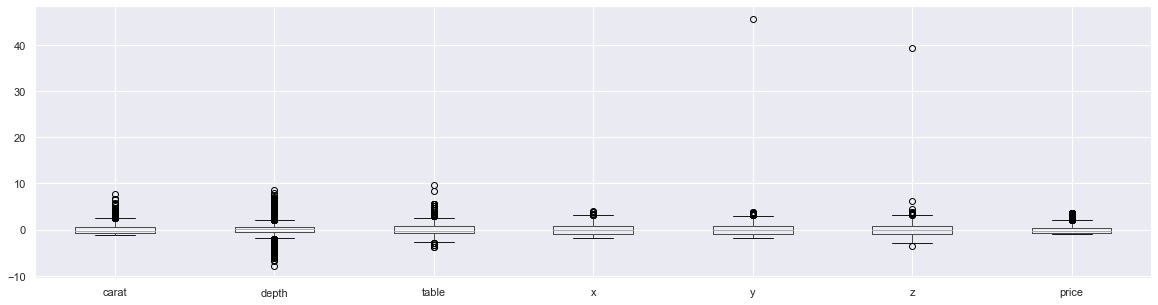

In [29]:
cz_df.boxplot(figsize=(20,5))

In [30]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [31]:
cont=cz_df.dtypes[(cz_df.dtypes!='uint8') & (cz_df.dtypes!='object')].index
for column in cz_df[cont].columns:
    lr,ur=remove_outlier(cz_df[column])
    cz_df[column]=np.where(cz_df[column]>ur,ur,cz_df[column])
    cz_df[column]=np.where(cz_df[column]<lr,lr,cz_df[column]) 


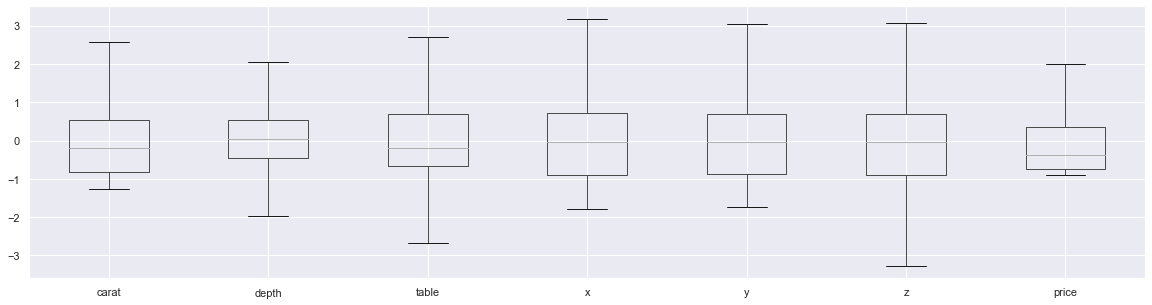

In [32]:
cz_df.boxplot(figsize=(20,5))

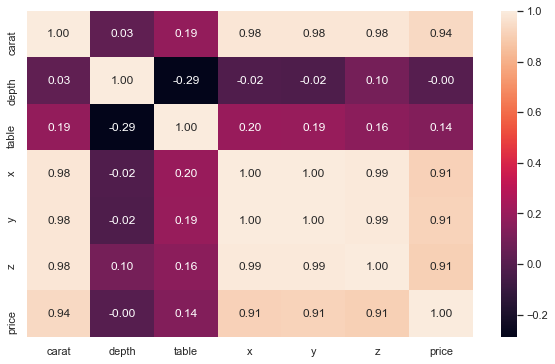

In [33]:
df_cor = cz_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f')

In [34]:
c_data = pd.get_dummies(cz_df, columns=['cut','color','clarity'],drop_first=True)

In [35]:
c_data.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
X = c_data.drop('price', axis=1)

y = c_data[['price']]

In [37]:
X.shape

(26958, 23)

In [38]:
y.shape

(26958, 1)

In [39]:
c_data.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
print('The coefficient of determination R^2 of the prediction on Train set',reg_model.score(X_train, y_train))
print('The coefficient of determination R^2 of the prediction on Test set',reg_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Train set 0.9419557931252712
The coefficient of determination R^2 of the prediction on Test set 0.9381643998102491


In [42]:
from sklearn.metrics import mean_squared_error
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,reg_model.predict(X_test))))
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(y_train,reg_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.21647817772382869
The Root Mean Square Error (RMSE) of the model is for training set is 0.20690072466418796


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, m) for m in range(X.shape[1])] 

In [44]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"  :  ",  vif[i])
        i = i+1

carat   :   33.35086119845924
depth   :   4.573918951598579
table   :   1.7728852812619
x   :   463.5542785436457
y   :   462.769821646584
z   :   238.65819968687333
cut_Good   :   3.6096181949437143
cut_Ideal   :   14.34812508118844
cut_Premium   :   8.623414379121153
cut_Very Good   :   7.848451571723688
color_E   :   2.371070464762613


In [45]:
c_data_train = pd.concat([X_train, y_train], axis=1)
c_data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [46]:
c_data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [47]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = c_data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Mon, 26 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:13:19   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

In [49]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (0.01) * depth + (-0.01) * table + (-0.31) * x + (0.3) * y + (-0.14) * z + (0.09) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

# Problem 2

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [51]:
df = pd.read_csv('Holiday_Package.csv')

In [52]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [54]:
df.shape

(872, 8)

In [55]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [56]:
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [57]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,NaN,NaN,NaN,436.5,251.869014,1.0,218.75,436.5,654.25,872.0
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
for column in df.columns:
    if df[column].dtype=='object':
        print(column.upper(),':', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')        

HOLLIDAY_PACKAGE : 2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN : 2
yes    216
no     656
Name: foreign, dtype: int64




In [59]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Distribution of Unnamed: 0
-------------------


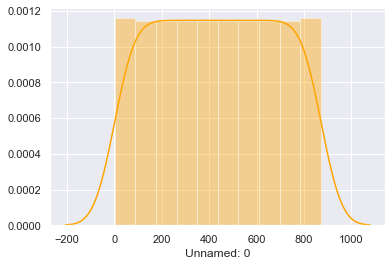

Boxplot of Unnamed: 0
-------------------


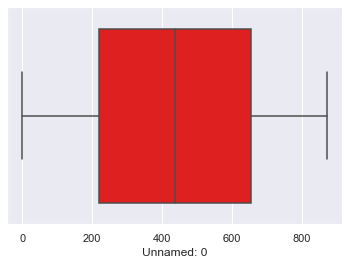

Distribution of Salary
-------------------


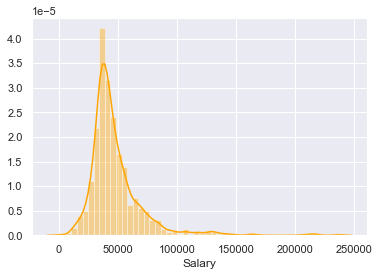

Boxplot of Salary
-------------------


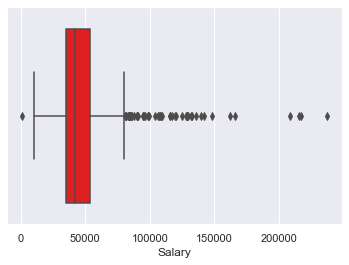

Distribution of age
-------------------


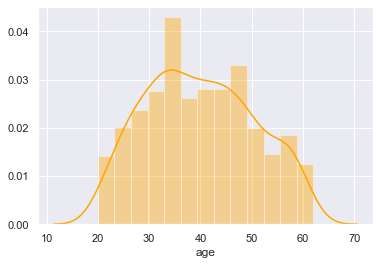

Boxplot of age
-------------------


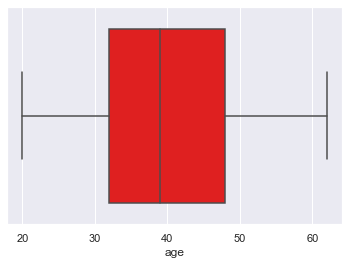

Distribution of educ
-------------------


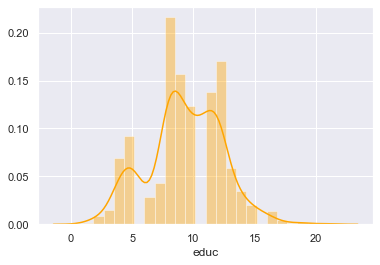

Boxplot of educ
-------------------


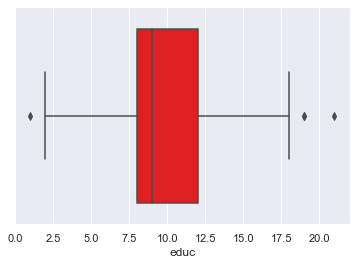

Distribution of no_young_children
-------------------


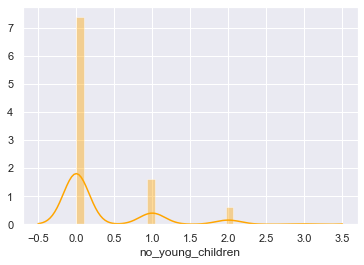

Boxplot of no_young_children
-------------------


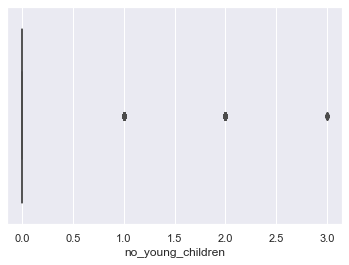

Distribution of no_older_children
-------------------


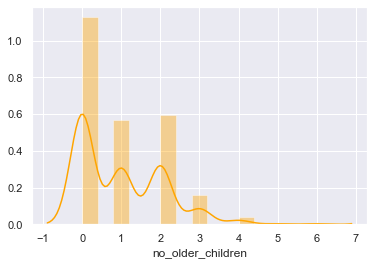

Boxplot of no_older_children
-------------------


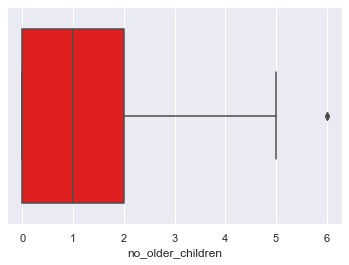

In [60]:
def univariateAnalysis_numeric(column, nbins):
       
    plt.figure()
    print("Distribution of " + column)
    print('-------------------')
    sns.distplot(df[column], kde=True, color='orange');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('-------------------')
    ax = sns.boxplot(x=df[column],color='red')
    plt.show()




df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,16)

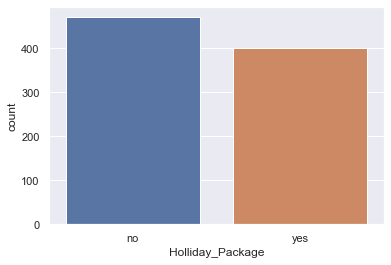

In [61]:
sns.countplot(x="Holliday_Package", data=df)

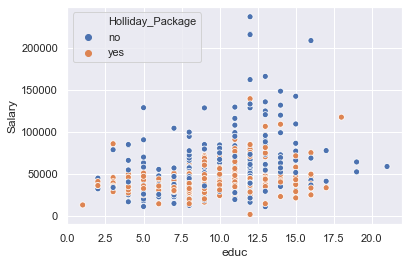

In [62]:
sns.scatterplot(data = df, x='educ',y='Salary', hue = 'Holliday_Package')

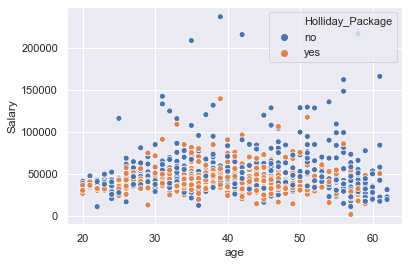

In [63]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

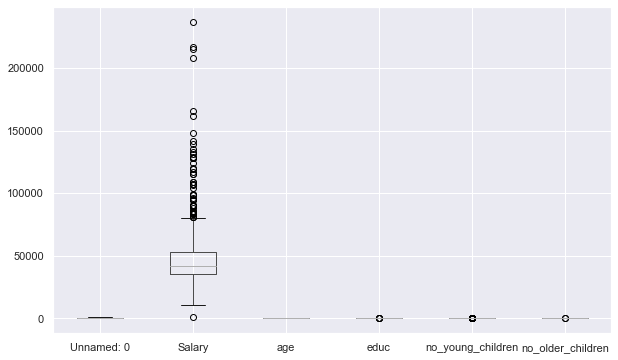

In [64]:
df.boxplot(figsize=(10,6))

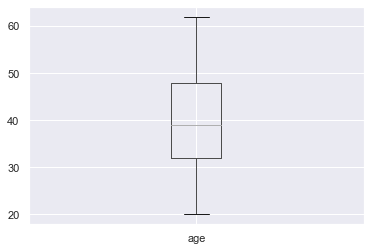

In [65]:
df.boxplot('age')

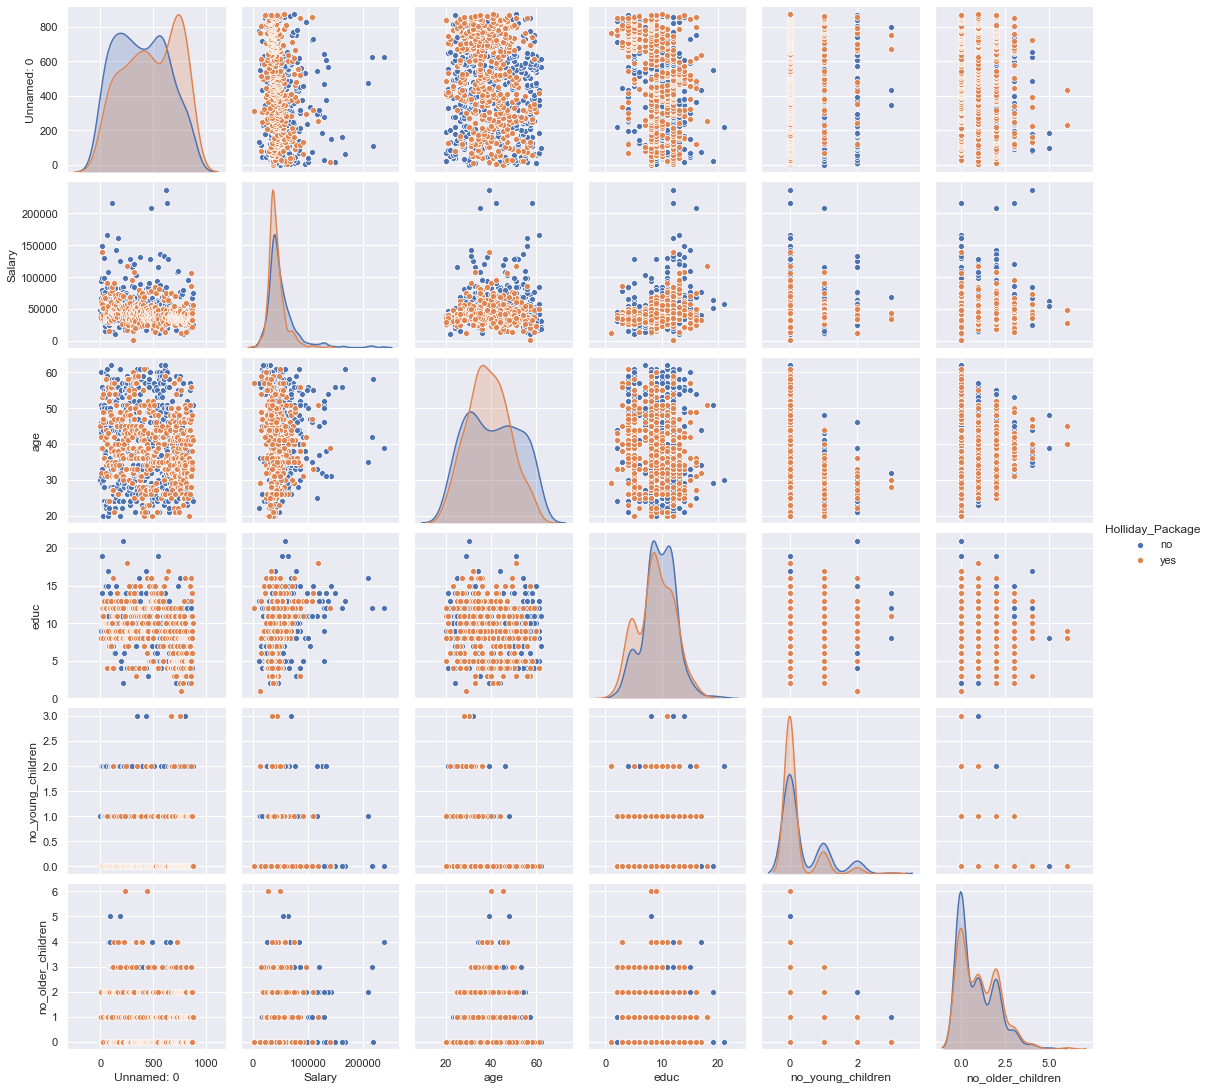

In [66]:
sns.pairplot(df ,diag_kind='kde' ,hue='Holliday_Package');

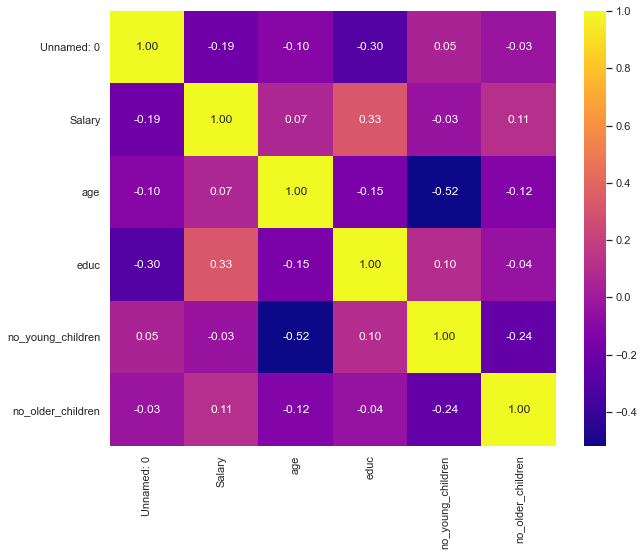

In [67]:
df_cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='plasma')

In [68]:
cont1=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index
for column in df[cont1].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

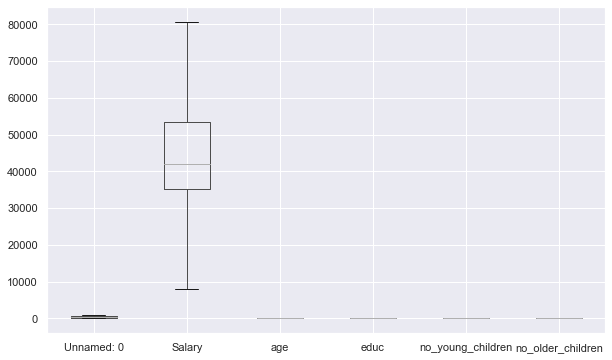

In [69]:
df.boxplot(figsize=(10,6))

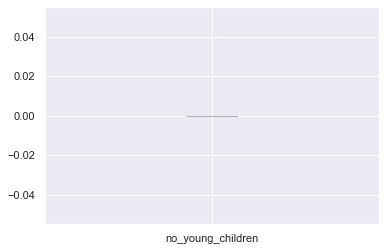

In [70]:
df.boxplot('no_young_children')

In [71]:
dum = pd.get_dummies(df, columns=['Holliday_Package','foreign'], drop_first = True)

In [72]:
dum.head()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,1.0,48412.0,30.0,8.0,0.0,1.0,0,0
1,2.0,37207.0,45.0,8.0,0.0,1.0,1,0
2,3.0,58022.0,46.0,9.0,0.0,0.0,0,0
3,4.0,66503.0,31.0,11.0,0.0,0.0,0,0
4,5.0,66734.0,44.0,12.0,0.0,2.0,0,0


In [73]:
X = dum.drop('Holliday_Package_yes', axis=1)

y = dum['Holliday_Package_yes']

In [74]:
X.head()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,1.0,48412.0,30.0,8.0,0.0,1.0,0
1,2.0,37207.0,45.0,8.0,0.0,1.0,0
2,3.0,58022.0,46.0,9.0,0.0,0.0,0
3,4.0,66503.0,31.0,11.0,0.0,0.0,0
4,5.0,66734.0,44.0,12.0,0.0,2.0,0


In [75]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package_yes, dtype: uint8

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [77]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.01,0.001]}

In [78]:
model = LogisticRegression(max_iter=100000)

In [79]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [81]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01} 

LogisticRegression(max_iter=100000, tol=0.01)


In [82]:
best_model = grid_search.best_estimator_

In [83]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [84]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.554769,0.445231
1,0.429842,0.570158
2,0.583852,0.416148
3,0.686327,0.313673
4,0.497417,0.502583


In [85]:
confusion_matrix(y_train, ytrain_predict)

array([[234,  92],
       [150, 134]], dtype=int64)

In [86]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       326
           1       0.59      0.47      0.53       284

    accuracy                           0.60       610
   macro avg       0.60      0.59      0.59       610
weighted avg       0.60      0.60      0.60       610



In [87]:
confusion_matrix(y_test, ytest_predict)

array([[98, 47],
       [56, 61]], dtype=int64)

In [88]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       145
           1       0.56      0.52      0.54       117

    accuracy                           0.61       262
   macro avg       0.60      0.60      0.60       262
weighted avg       0.60      0.61      0.60       262



AUC: 0.621


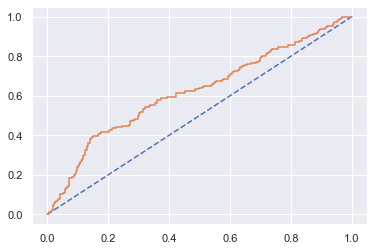

In [89]:
probs = best_model.predict_proba(X_train)
probs = probs[:, 1]
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.656


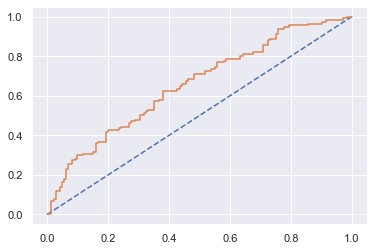

In [90]:
probs = best_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [91]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[0 1]


feature: foreign
[0 1]


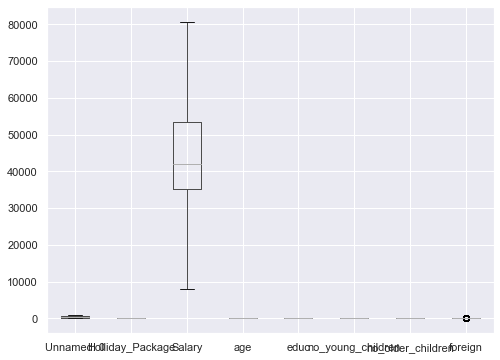

In [92]:
df.boxplot(figsize=(8,6))

In [93]:
X = df.drop('Holliday_Package',axis=1)
Y = df.pop('Holliday_Package')

In [94]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1)

In [95]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [96]:
pred_clf_train = model.predict(X_train)
pred_clf_test = model.predict(X_test)

In [97]:
pred_clf_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int8)

In [98]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [99]:
print(classification_report(Y_train, pred_clf_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       326
           1       0.66      0.44      0.52       284

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [100]:
confusion_matrix(Y_train, pred_clf_train)

array([[261,  65],
       [160, 124]], dtype=int64)

In [101]:
print(classification_report(Y_test, pred_clf_test))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       145
           1       0.60      0.45      0.52       117

    accuracy                           0.62       262
   macro avg       0.62      0.61      0.60       262
weighted avg       0.62      0.62      0.61       262



In [102]:
confusion_matrix(Y_test, pred_clf_test)

array([[110,  35],
       [ 64,  53]], dtype=int64)

In [103]:
lda_metrics=classification_report(Y_train, pred_clf_train,output_dict=True)
df=pd.DataFrame(lda_metrics).T
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_acc=round(df.loc['1'][0],2)
print('lda_train_acc',lda_train_acc)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_acc 0.66
lda_train_precision  0.66
lda_train_recall  0.44
lda_train_f1  0.52


In [104]:
lda_metrics=classification_report(Y_test, pred_clf_test,output_dict=True)
df=pd.DataFrame(lda_metrics).T
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_acc=round(df.loc['1'][0],2)
print('lda_test_acc',lda_test_acc)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_acc 0.6
lda_test_precision  0.6
lda_test_recall  0.45
lda_test_f1  0.52


In [105]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).T
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
lr_train_acc=round(best_model.score(X_train, y_train),2)
print('lr_train_acc',lr_train_acc)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_acc 0.6
lr_train_precision  0.59
lr_train_recall  0.47
lr_train_f1  0.53


In [106]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
lr_test_acc=round(best_model.score(X_test, y_test),2)
print('lr_test_acc',lr_test_acc)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_acc 0.61
lr_test_precision  0.56
lr_test_recall  0.52
lr_test_f1  0.54


AUC for the Training Data: 0.671


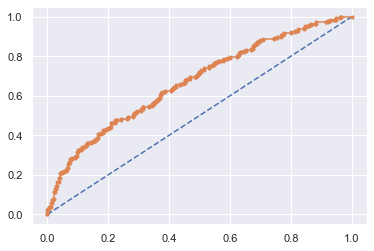

In [107]:
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.show()


AUC for the Test Data: 0.658


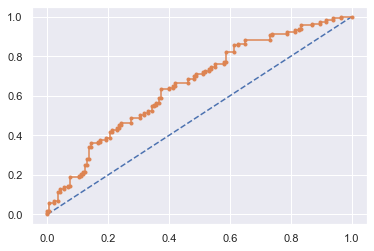

In [108]:
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.show()

In [109]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.60,0.61,0.66,0.60
AUC,0.62,0.66,0.67,0.66
Recall,0.47,0.52,0.44,0.45
Precision,0.59,0.56,0.66,0.60
F1 Score,0.53,0.54,0.52,0.52
